<a href="https://colab.research.google.com/github/quddaz/Machine_Learing/blob/main/7%EC%9E%A5/7-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

In [8]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



> **<손실 곡선>**

+ 노트 북의 코돌 셀에서는 print하지 않아도 마지막 라인의 실행 결과를 자동으로 출력한다.
+ fit 메서드의 History 클래스 객체를 반환한다.




In [13]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)



> **<함수 지정하여 모델 마들기>**



In [14]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model



> **<Summary 출력>**



In [15]:
model = model_fn()

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




> **<fit 메서드의 결과를 history 변수에 담기>**




In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history.history.keys())

dict_keys(['loss', 'accuracy'])




> **<history 변수 내용 출력>**




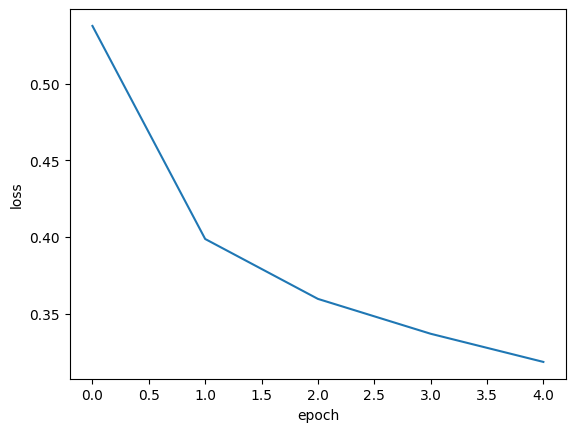

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

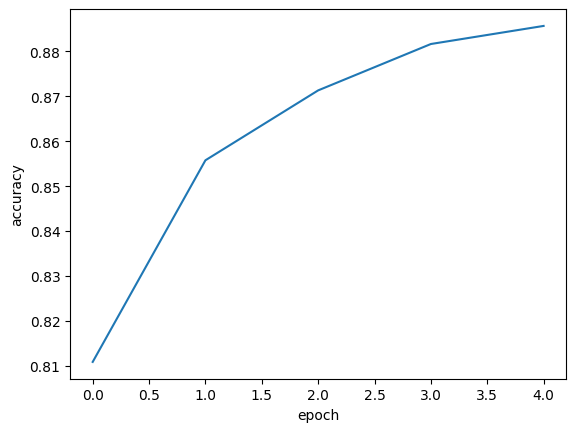

In [18]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


> **<에포크 20으로 늘려 모델 훈련>**



In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

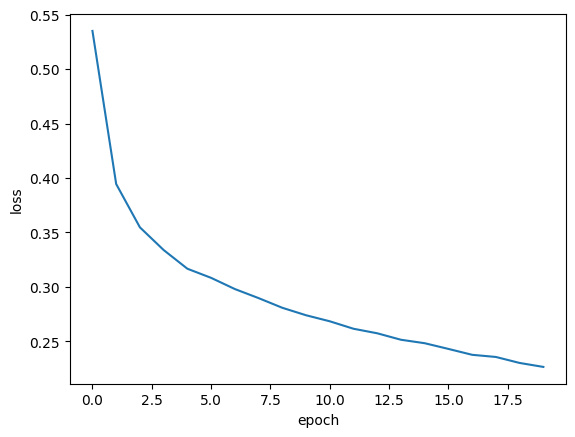

In [20]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실



> **<훈련 세트와 검증 세트의 검증 손실>**
+ 인공 신경망 모델의 최적화 대상은 정확도가 아니라 손실 함수이다.
+ 손실 감소에 비례하여 정확도는 높지 않을 수 있다.

+ validation_data 매개변수는 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달한다.



In [21]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

+ history.history 딕셔너리의 검증 세트를 확인

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])




> **<그래프로 확인해보기>**



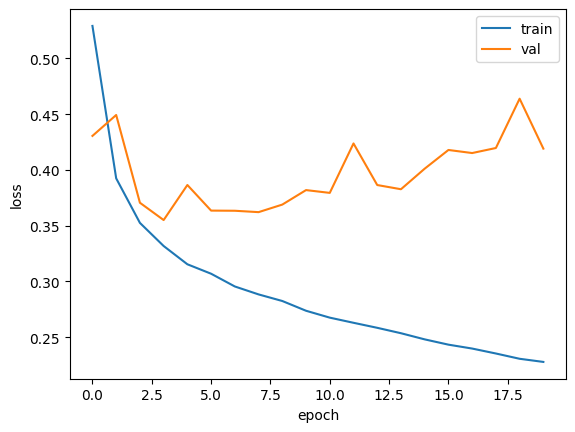

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()



> **<옵티마이저로 과대적합 완화>**



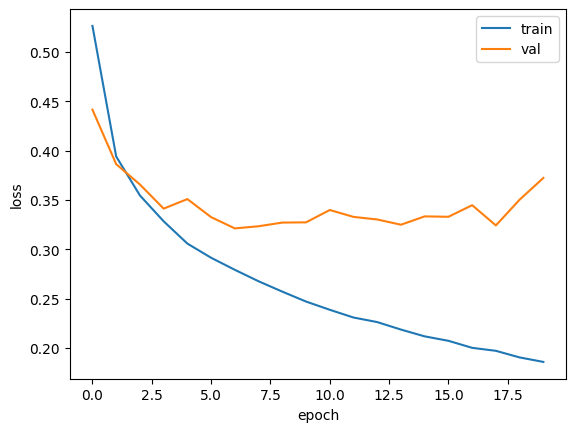

In [24]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭 아웃

+ 딥러닝의 아버지인 제프리 힌턴이 소개하였다.
+ 훈련 과정에서 일부 뉴런을 랜덤하게 꺼내서 뉴런의 출력을 0으로 만듬
+ 드롭아웃의 비율은 하이퍼 파라미터이다.

In [25]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


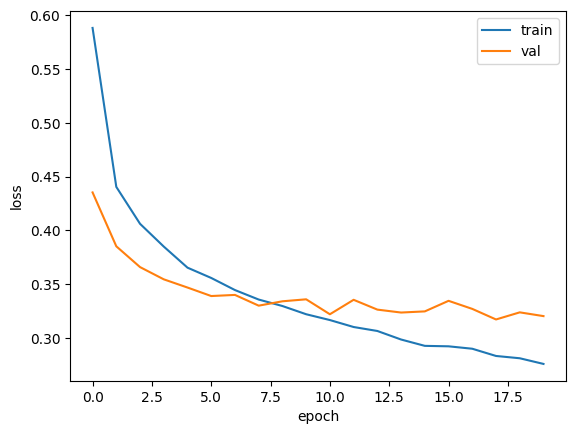

In [26]:


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 저장과 복원



> **<에포크 12로 다시 훈련>**



In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))



> **<훈련된 모델의 파라미터를 저장하는 Model-weights()>**

+ 텐서플로의 체크포인트 포맷으로 저장
+ 확장자가 h5면 HDF5 포맷으로 저장

In [29]:
model.save_weights('model-weights.h5')



> **<모델 구조와 모델 파라미터 저장 : Model-whole()>**


In [28]:
model.save('model-whole.h5')
!ls -al *.h5

-rw-r--r-- 1 root root 981176 May 21 07:07 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




> **<저장된 내용 확인>**
+ 훈련을 하지 않은 새로운 모델을 만들고, model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다.
+ model-whole.h5 파일에서 새로운 모델을 만들어서 사용




In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

# load_weights()를 사용하려면 save_weights()로 저장했던 모델과 정확히 같은 구조를 사용해야 된다.



> **<모델의 검증 정확도 확인>**



In [30]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8794166666666666


In [31]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8794


[0.3411038815975189, 0.8794166445732117]

## 콜백

+ 20번 에포크하여 모델을 훈련하여 검증 점수가 상승하는 지점을 확인하고, 그 다음 모델을 과대적합 되지 않는 만큼 다시 훈련한다.
+ 모델을 두 번씩 훈련하지 않는 방법은 없을까?
+ callback : 훈련 과정 중간에 어떤 작업을 수행
+ keras.callbacks : 패키지 아래의 클래스

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [33]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8885


[0.3210257887840271, 0.8884999752044678]

### 조기 종료

+ 과대적합 전에 훈련을 미리 종료
+ 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나이다.
+ 조기 종료를 위한 EarlyStopping 콜백을 제공한다.

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [35]:
print(early_stopping_cb.stopped_epoch)

10


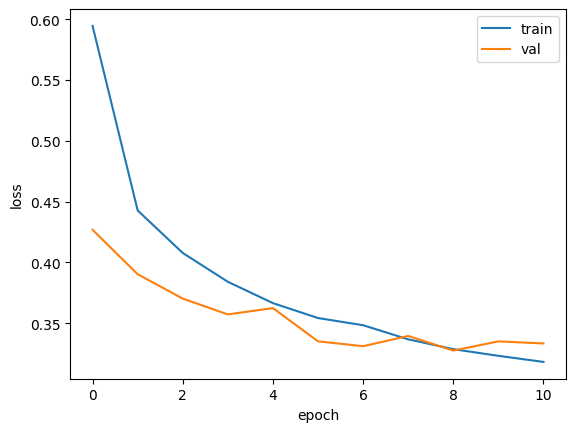

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model.evaluate(val_scaled, val_target)